In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [7]:
sgd=SGDClassifier(random_state=42)
sgd.fit(train_scaled,train_target)
print(sgd.score(train_scaled,train_target))
print(sgd.score(test_scaled,test_target))

0.907563025210084
0.925


In [9]:
#교재 방식

sgd2=SGDClassifier(loss='log_loss',max_iter=10,random_state=42)
sgd2.fit(train_scaled,train_target)
print(sgd2.score(train_scaled,train_target))
print(sgd2.score(test_scaled,test_target))

0.773109243697479
0.775


c:\ProgramData\anaconda3\envs\mldltest1\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 반복 횟수가 적어서 추가로 훈련할 경우
# partial_fit() 메서드를 사용하여 1 에포크씩 이어서 훈련한다

### partial_fit

>목적

partial_fit 메서드는 데이터셋의 일부분만을 사용하여 모델을 점진적으로 학습시키는 데 사용됩니다. 이를 통해 전체 데이터셋을 한 번에 메모리에 로드하지 않고도 학습할 수 있습니다.

>사용 예

이 메서드는 특히 온라인 학습(데이터가 연속적으로 제공되는 상황)이나 큰 데이터셋에 유용합니다. partial_fit은 기존 모델을 업데이트할 수 있게 해주며, 학습을 여러 번의 패치로 나눠서 할 수 있게 합니다.

In [11]:
sgd2.partial_fit(train_scaled,train_target)
print(sgd2.score(train_scaled,train_target))
print(sgd2.score(test_scaled,test_target))

0.8151260504201681
0.85


# 에포크와 과대/과소적합 

In [12]:

import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [14]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

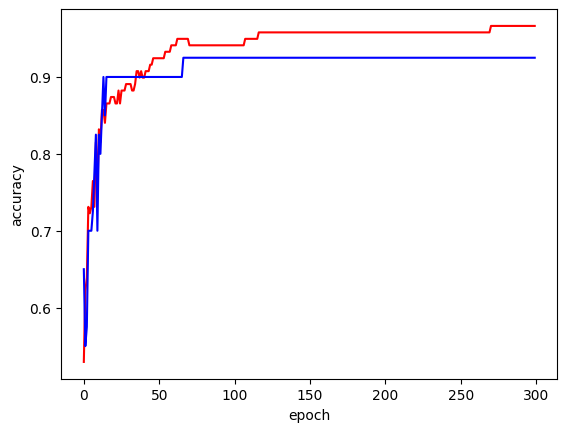

In [16]:
import matplotlib.pyplot as plt

plt.plot(train_score,'r')
plt.plot(test_score,'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 최종 모델 만들기

In [20]:
sgd_final = SGDClassifier(loss='log_loss', max_iter=100,
                   tol=None, random_state=42)
sgd_final.fit(train_scaled, train_target)

print(sgd_final.score(train_scaled, train_target))
print(sgd_final.score(test_scaled, test_target))

0.957983193277311
0.925


In [24]:
sgd_final2 = SGDClassifier(loss='hinge', max_iter=100,
                          random_state=42
                           )
sgd_final2.fit(train_scaled, train_target)

print(sgd_final2.score(train_scaled, train_target))
print(sgd_final2.score(test_scaled, test_target))

0.907563025210084
0.925


In [23]:
# 위의 코드와 tol=None 의 유무 차이

sgd_final2 = SGDClassifier(loss='hinge', max_iter=100,
                           tol=None, random_state=42,
                           )
sgd_final2.fit(train_scaled, train_target)

print(sgd_final2.score(train_scaled, train_target))
print(sgd_final2.score(test_scaled, test_target))

0.9495798319327731
0.925


# 확인 문제

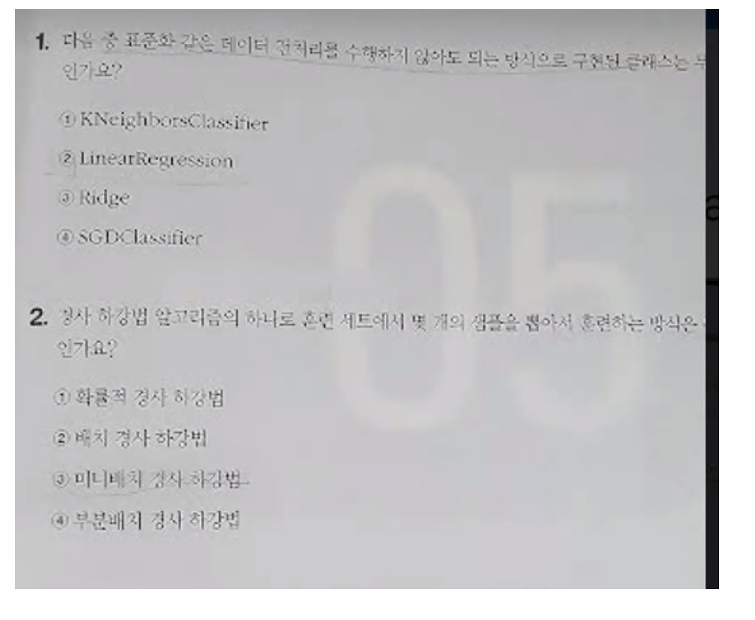

In [ ]:
# 1. 3 //2. 3